# Homework 02 - MLZoomcamp 2023

In [1]:
!wget wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 16:43:08--  http://wget/
Resolving wget (wget)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘wget’
--2023-09-25 16:43:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  2.39MB/s    in 0.6s    

2023-09-25 16:43:10 (2.39 MB/s) - ‘housing.csv’ saved [1423529/1423529]

FINISHED --2023-09-25 16:43:10--
Total wall clock time: 1.7s
Downloaded: 1 files, 1.4M in 0.6s (2.39 MB/s)


In [241]:
from matplotlib.style import use

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

use('seaborn-v0_8')
%matplotlib inline

## EDA

In [242]:
df = pd.read_csv('housing.csv')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


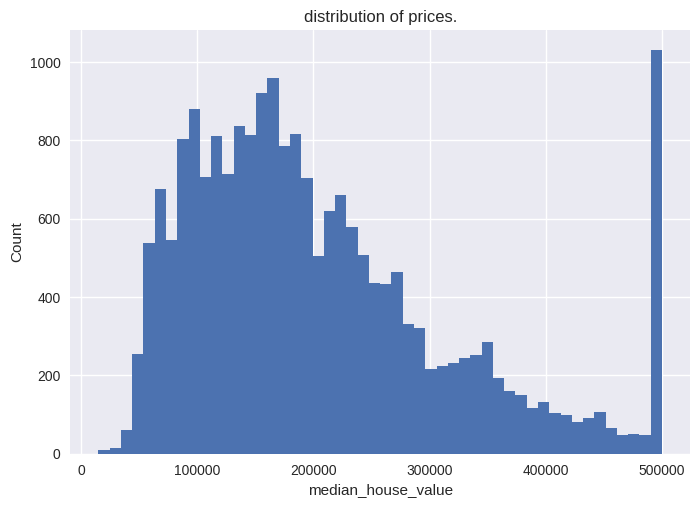

In [244]:
plt.hist(df.median_house_value, bins=50)
plt.title('distribution of prices.')
plt.xlabel('median_house_value')
plt.ylabel('Count')
plt.show()

## Preparing the dataset

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [246]:
new_df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]

In [247]:
new_df = new_df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

## Question 01

In [248]:
new_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 02

In [249]:
new_df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

## Prepare and split the dataset

In [250]:
n_samples = len(new_df)
n_val = int(len(new_df) * 0.2)
n_test = int(len(new_df) * 0.2)
n_train = n_samples - (n_val + n_test)

print(f'Number of training samples: {n_train}')
print(f'Number of validation samples: {n_val}')
print(f'Number of testing samples: {n_test}')

Number of training samples: 9413
Number of validation samples: 3137
Number of testing samples: 3137


In [251]:
idx = np.arange(n_samples)
np.random.seed(42)
np.random.shuffle(idx)

In [252]:
df_val = new_df.iloc[idx[:n_val]]
df_test = new_df.iloc[idx[n_val:n_val + n_test]]
df_train = new_df.iloc[idx[n_val + n_test:]]

In [253]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [254]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [255]:
df_train.median_house_value

0       115600.0
1       307100.0
2       312500.0
3       230600.0
4        64400.0
          ...   
9408    500001.0
9409    268400.0
9410    234400.0
9411     83400.0
9412    270400.0
Name: median_house_value, Length: 9413, dtype: float64

In [256]:
df_train['median_house_value'] = np.log1p(df_train.median_house_value)
df_val['median_house_value'] = np.log1p(df_val.median_house_value)
df_test['median_house_value'] = np.log1p(df_test.median_house_value)

In [257]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [258]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 03

In [259]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [260]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Missing values replaced with value 0.

In [261]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        95
population             0
households             0
median_income          0
dtype: int64

In [262]:
df_train_zero = df_train.fillna(value=0)

In [263]:
df_train_zero.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [264]:
w_0, w = train_linear_regression(df_train_zero.values, y_train)

In [265]:
df_val_zero = df_val.fillna(value=0)

In [266]:
y_pred_01 = w_0 + df_val_zero.values.dot(w)

In [267]:
rmse_val_01 = rmse(y_val, y_pred_01)
rmse_val_01 = round(rmse_val_01, 2)
rmse_val_01

0.34

### Missing values replaced with the mean

In [268]:
total_bedrooms_mean = df_train.total_bedrooms.mean()
df_train_total_bedrooms = df_train.fillna(value=total_bedrooms_mean)

In [269]:
df_train_total_bedrooms.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [270]:
w_0, w = train_linear_regression(df_train_total_bedrooms.values, y_train)

In [271]:
df_val_total_bedrooms = df_val.fillna(value=total_bedrooms_mean)

In [272]:
y_pred_02 = w_0 + df_val_total_bedrooms.values.dot(w)

In [273]:
rmse_val_02 = rmse(y_val, y_pred_02)
rmse_val_02 = round(rmse_val_02, 2)
rmse_val_02

0.34

## Question 04

In [274]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [275]:
n_samples = len(new_df)
n_val = int(len(new_df) * 0.2)
n_test = int(len(new_df) * 0.2)
n_train = n_samples - (n_val + n_test)

print(f'Number of training samples: {n_train}')
print(f'Number of validation samples: {n_val}')
print(f'Number of testing samples: {n_test}')

Number of training samples: 9413
Number of validation samples: 3137
Number of testing samples: 3137


In [284]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = []

idx = np.arange(n_samples)
np.random.seed(42)
np.random.shuffle(idx)
    
df_val = new_df.iloc[idx[:n_val]]
df_test = new_df.iloc[idx[n_val:n_val + n_test]]
df_train = new_df.iloc[idx[n_val + n_test:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)
    
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
    
df_train = df_train.fillna(value=0)
df_val = df_val.fillna(value=0)
    
for seed_value in r:
    w_0, w = train_linear_regression_reg(df_train.values, y_train, r)
    y_pred = w_0 + df_val.values.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    rmse_val = round(rmse_val, 2)
    rmse_scores.append(rmse_val)

In [285]:
rmse_scores

[0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34]

## Question 05

In [288]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed_value in seeds:
    idx = np.arange(n_samples)
    np.random.seed(seed_value)
    np.random.shuffle(idx)
    
    df_val = new_df.iloc[idx[:n_val]]
    df_test = new_df.iloc[idx[n_val:n_val + n_test]]
    df_train = new_df.iloc[idx[n_val + n_test:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    df_train = df_train.fillna(value=0)
    w_0, w = train_linear_regression_reg(df_train.values, y_train)
    
    df_val = df_val.fillna(value=0)
    
    y_pred = w_0 + df_val.values.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    rmse_val = round(rmse_val, 2)
    rmse_scores.append(rmse_val)

In [289]:
std = np.std(rmse_scores)
std = round(std, 3)
std

0.008